## Using Iris dataset to test K-means algorithm

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


In [ ]:
def visualize_clusters(df):
    # Visualize the clusters
    colors = ['r', 'g', 'b']  # Example colors for each cluster

    plt.figure(figsize=(8, 6))
    for cluster_num in df['cluster'].unique():
        cluster_indices = df[df['cluster'] == cluster_num].index
        plt.scatter(df.loc[cluster_indices, 'petal length (cm)'], df.loc[cluster_indices, 'petal width (cm)'],
                    c=colors[cluster_num], label=f'Cluster {cluster_num}')

    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title('Scatter Plot of Clusters')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Load the Iris dataset

def loading_dataset():
  iris = load_iris()
  iris_array = np.array(iris["data"])
  df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])

  df["cluster"]=0

  return df , iris_array

In [ ]:
def init_centroids(k):
  k_samples = df.sample(n=k) # Random examples
  centroids = []
  for i in range(len(k_samples)):
    centroids.append(k_samples.iloc[i][0:4])

  return np.array(centroids)

In [ ]:
# Calculate distance between centroids and all the examples
def get_distances(centroids,irris_array):
  distances = []
   # 3 steps to calculate the distance
  for i in range(len(centroids)):

    summed = np.sum(centroids[i] - iris_array,axis=1)

    squared = np.square(summed)
    distance = np.sqrt(squared)

    #print(distance.shape)

    distances.append(distance)


  return np.transpose(np.array(distances))

In [ ]:
# Calculating new centroids
def get_new_centroids(cs:list): # cs is the list of unique clusters after the previous update
  centroids = []
  for c in cs:

    centroid = np.array(df.loc[df['cluster']==c])
    centroid = np.mean(centroid,axis=0)

    centroids.append(centroid[0:4]) # 0:4 only the features

  return np.array(centroids)

NEW CLUSTRING!!


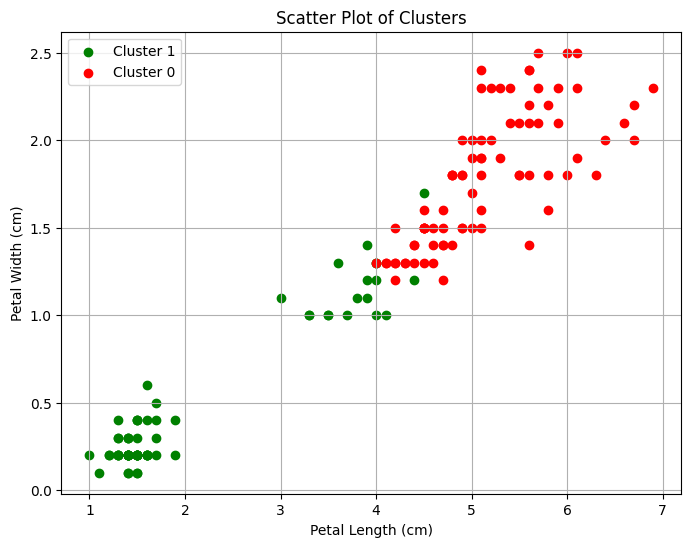

NEW CLUSTRING!!


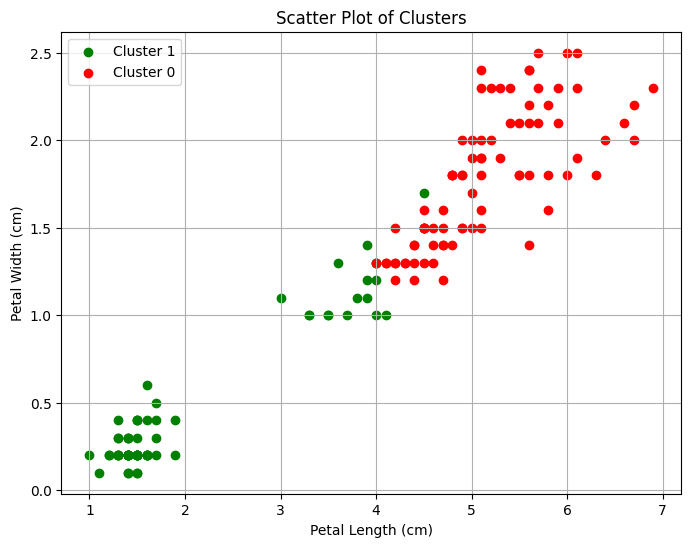

NEW CLUSTRING!!


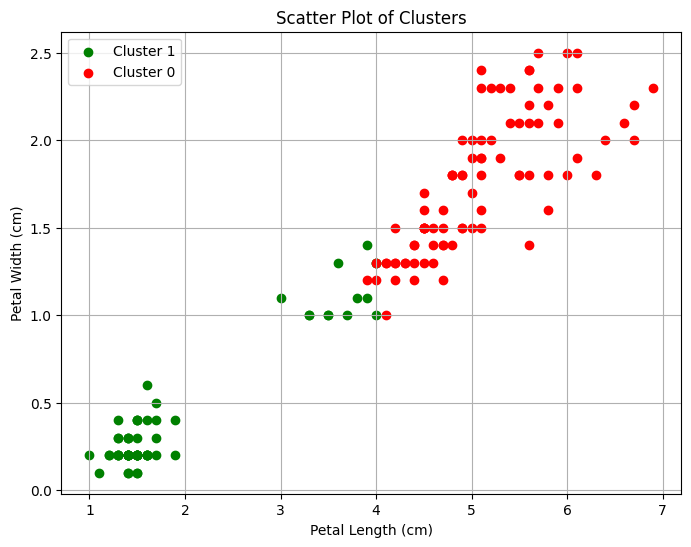

NO CHANGING !!


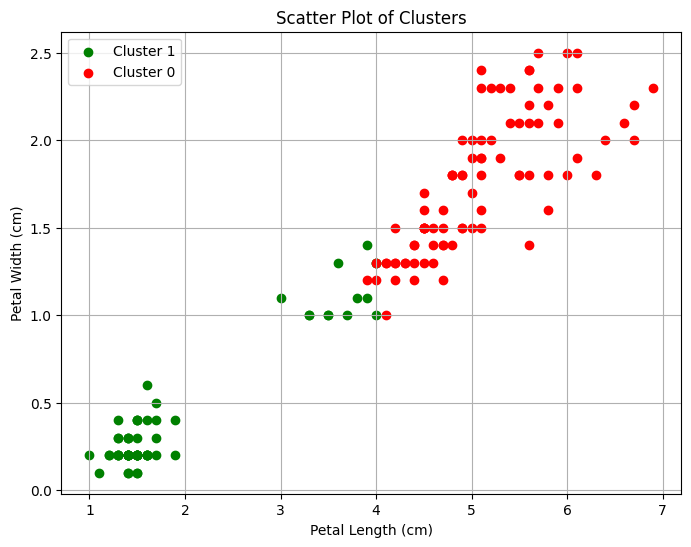

array([1, 0])

In [ ]:
df, iris_array = loading_dataset()

'''
  K: is the number of clusters , it is fixed
  Cluster_before: is useful to verify if there is a potential update or not
  is_changed: if is False no update is needed the clustring is finished, Otherwise we continue

'''


k = 3

# Selectinf Random centroids from the dataset
centroids = init_centroids(k)

cluster_before = np.array(df["cluster"])

# Calculating the new clusters
all_distances = get_distances(centroids,iris_array)
clusters = np.argmax(all_distances,axis=1)

# Updatin the dataframe with the new clusters
df["cluster"] = clusters


is_changed = True


while is_changed:

  # Calculating the new centroids
  cs = df['cluster'].unique()
  new_centroids = get_new_centroids(cs)

  cluster_before = np.array(df["cluster"])

  # Calculating the new clusters
  all_distances = get_distances(new_centroids,iris_array)
  clusters = np.argmax(all_distances,axis=1)

  # Checking if the clusters are not the same ==> potantial update
  if not(np.array_equal(clusters,cluster_before)):

    # Updating the dataFrame
    print("NEW CLUSTRING!!")
    df["cluster"] = clusters
    #
    visualize_clusters(df)

  else:
    print("NO CHANGING !!")
    is_changed = False
    visualize_clusters(df)

df['cluster'].unique()
